# Flight Fare Price Prediction

# Problem Statement
- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story.
We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.


### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('Flight_Fare.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Domain Analysis
- Airline: Serves as a categorical representation of various airline companies.
- Date_of_Journey: Denotes the specific dates on which travel occurs, and is crucial for recognizing patterns and trends in ticket prices over time.
- Source: Represents the departure locations or cities for airline journeys.
- Destination: Signifies the arrival locations or cities for airline journeys.
- Route: Outlines the specific flight paths or itineraries for airline journeys.
- Dep_Time: Records the departure times for airline flights. This temporal data is essential for price prediction models as it helps capture variations in ticket prices based on different departure times throughout the day.
- Arrival_Time: Denotes the times at which airline flights are scheduled to arrive at their destinations. This temporal information is crucial for price prediction models as it contributes to understanding how arrival times may influence ticket prices.
- Duration: Represents the total time taken for airline flights, typically measured in hours and minutes.
- Total_stops: indicates the number of layovers or stops a flight has during its journey.
- Additional_Info: Mentions various information about the journey including but not limited to BusinessClass,Changing Airports, Meals provided, Layovers etc.
- Price: Serves as the target variable for price prediction models. This numerical data represents the cost of airline tickets.

In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- There are 10683 entries in given dataser
- There is one null value in route and one in total_stop



In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- The average flight price is approximately ~₹9087.06
- The standard deviation of approximately ~₹4611 suggests a significant amount of variability or dispersion in flight prices around the mean. This indicates that prices vary widely across different flights.
- The minimum price observed in the dataset is ₹1759, while the maximum price is ₹79512. This range indicates the extent of variability in flight prices, with some flights being relatively inexpensive while others are very expensive.
- The difference between the 75th percentile (Q3) and the 25th percentile (Q1) is approximately ₹7096. This provides a measure of the spread of prices within the middle 50% of the data.



Overall, these trends suggest that flight prices in the dataset exhibit a wide range of variability, with a substantial proportion of prices falling between the 25th and 75th percentiles.

In [7]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


- The dataset contains information about multiple airlines, with Jet Airways being the most frequent, appearing 3,849 times.

In [8]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

- There are 12 different airline

In [9]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

- Some of the Airlines have very low frequency

In [10]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

- More than 80% of Additional_Info belongs to 'No info'

In [11]:
#Gives maximum Price in each Airline in Decreasing order
df.groupby('Airline').agg({'Price':'max'}).sort_values(by='Price', ascending=False)

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


In [12]:
df.duplicated().sum()

220

- we must drop this in preprocessing

# EDA
#### Univariate Analysis


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB 1.7 MB/s eta 0:00:10
   - -------------------------------------- 0.5/15.1 MB 6.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/15.1 MB 8.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/15.1 MB 9.9 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/15.1 MB 9.3 MB/s eta 0:00:02
   ------- -------------------------

                                             |                                             | [  0%]   00:00 ->…


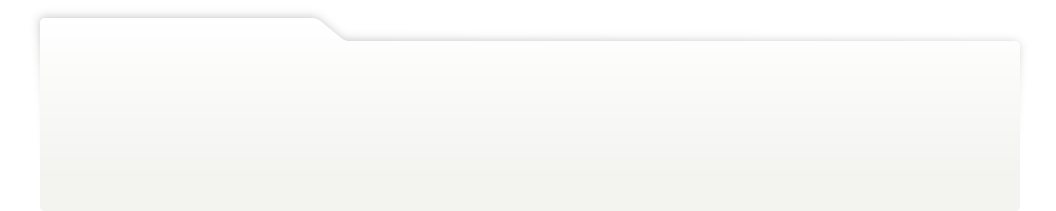
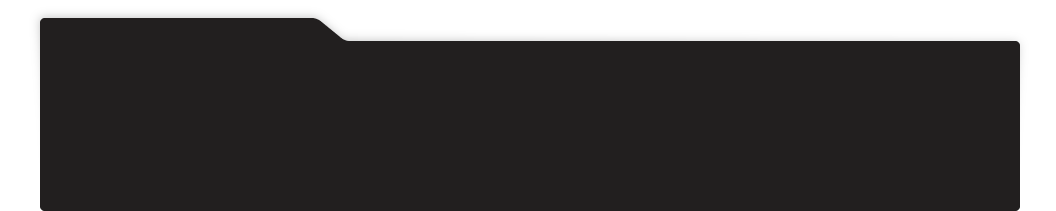
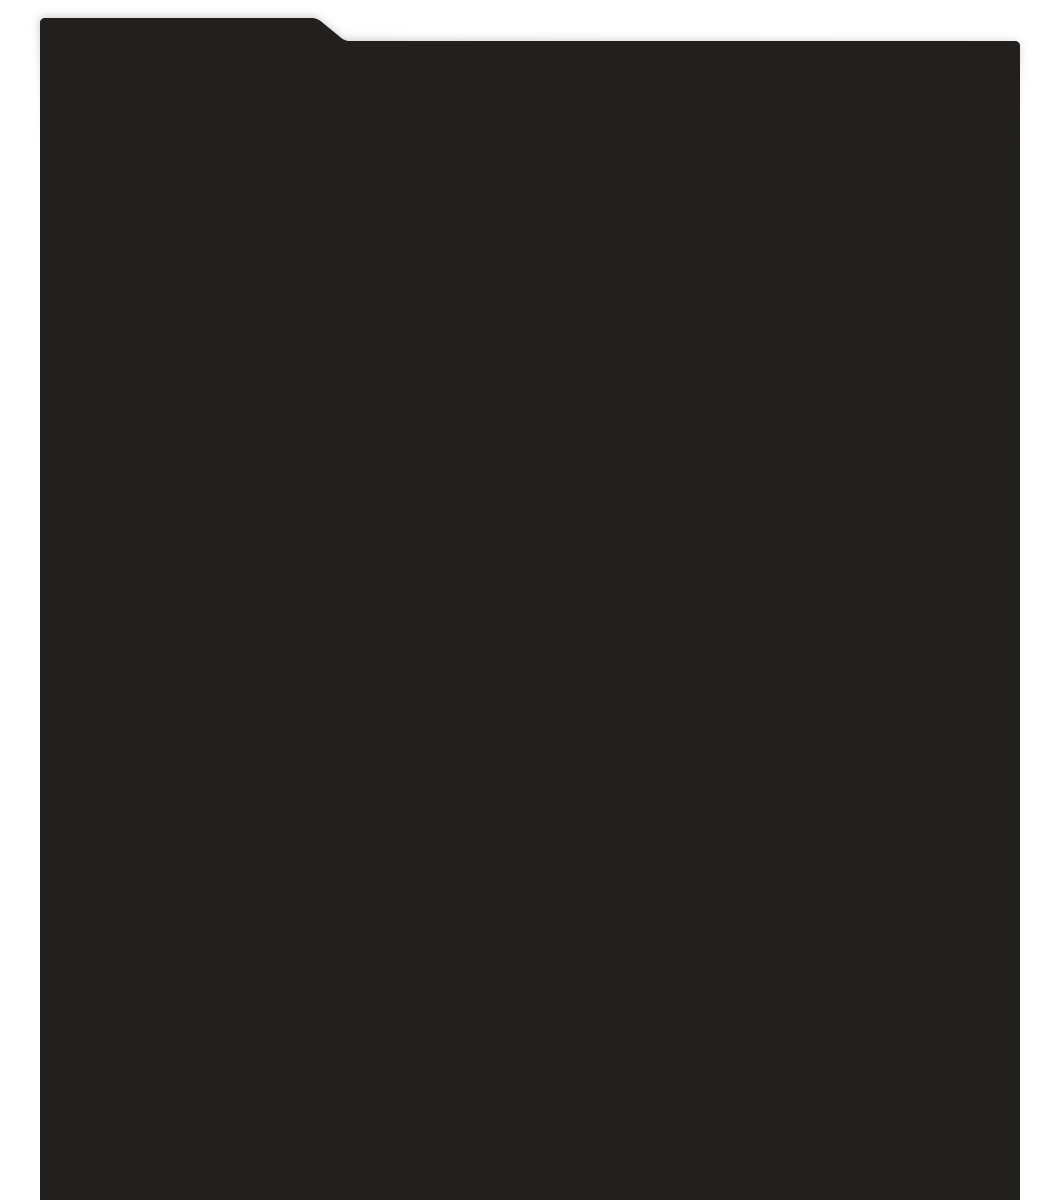
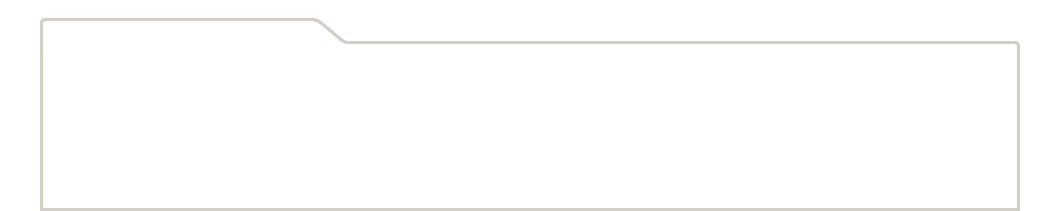
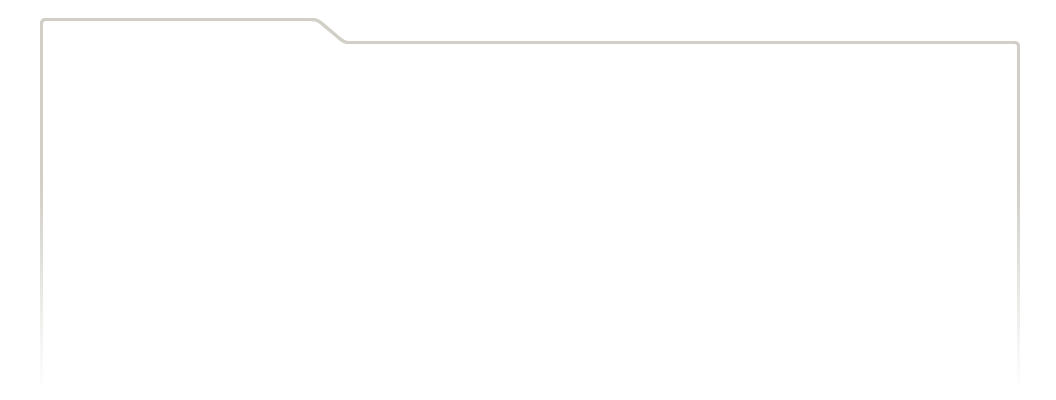
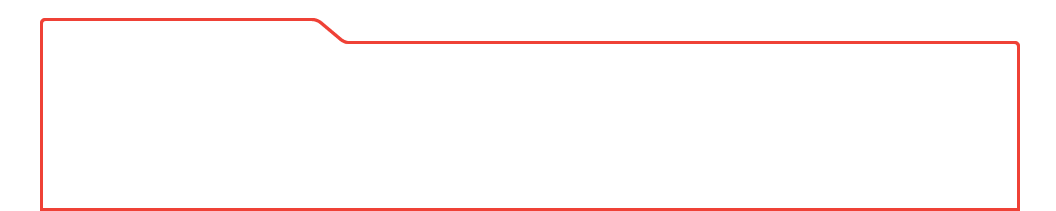
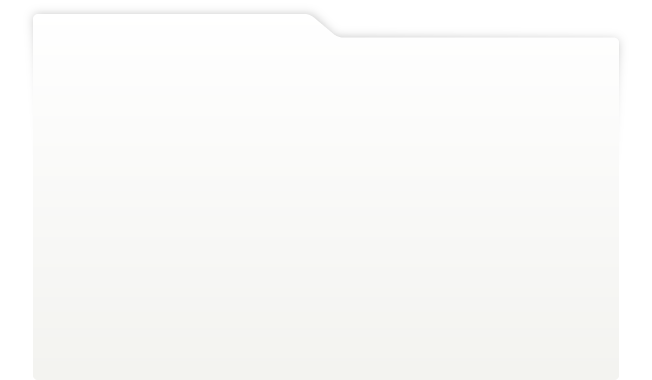
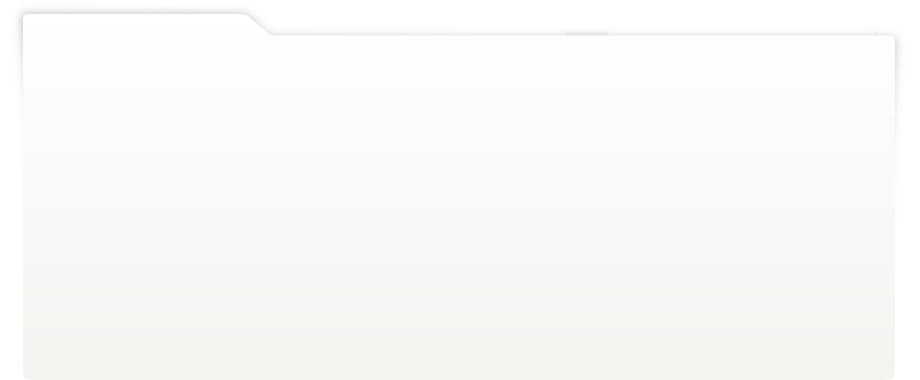
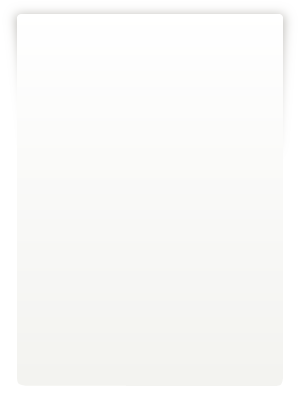
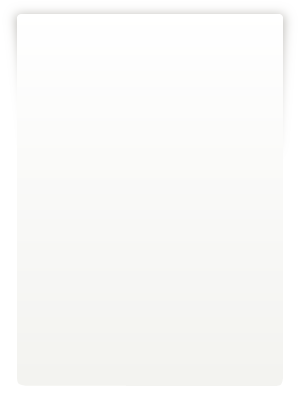
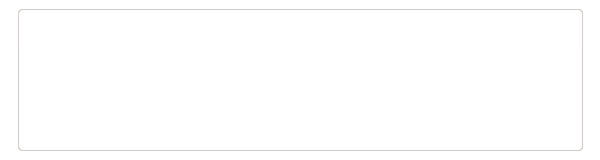
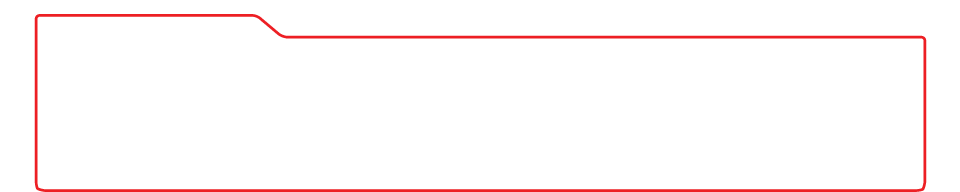
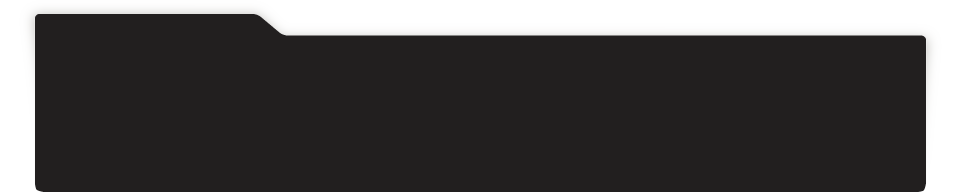
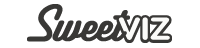
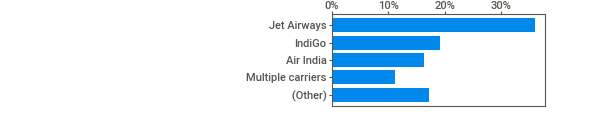
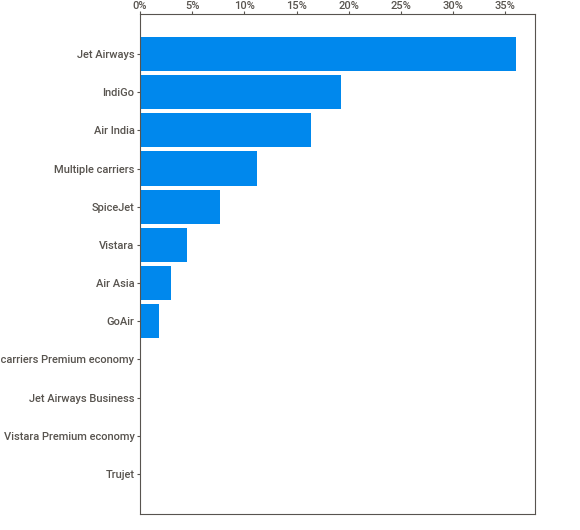
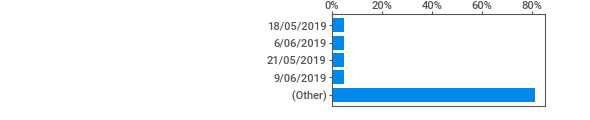
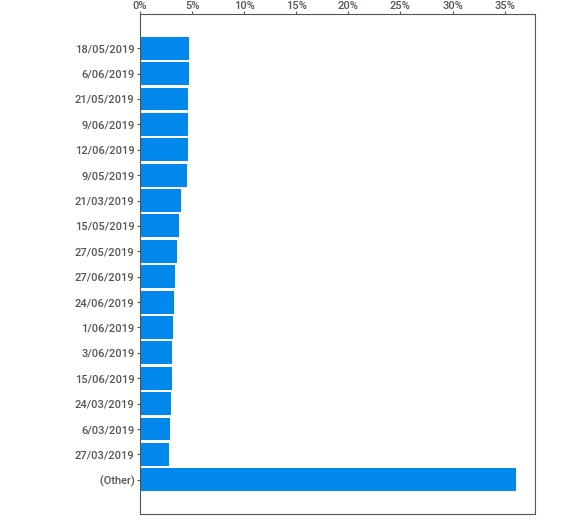
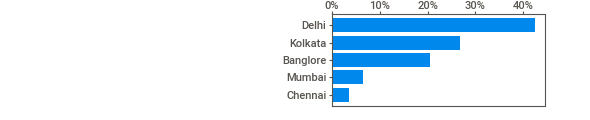
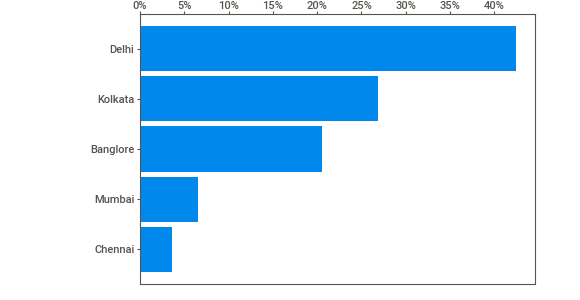
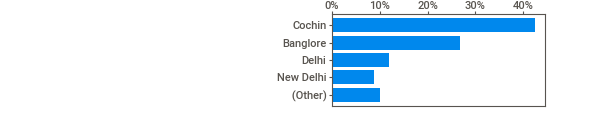
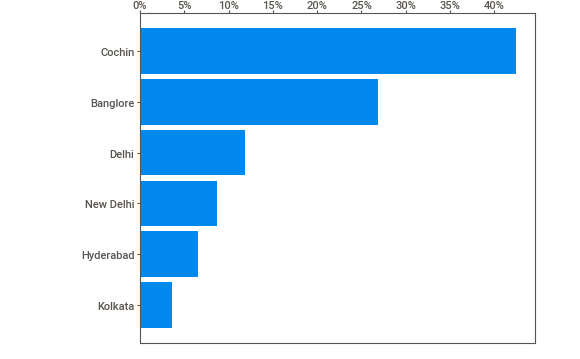
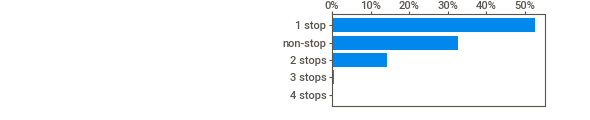
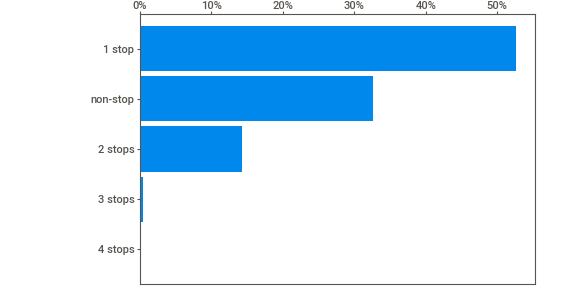
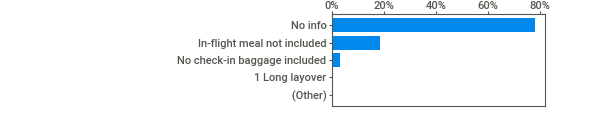
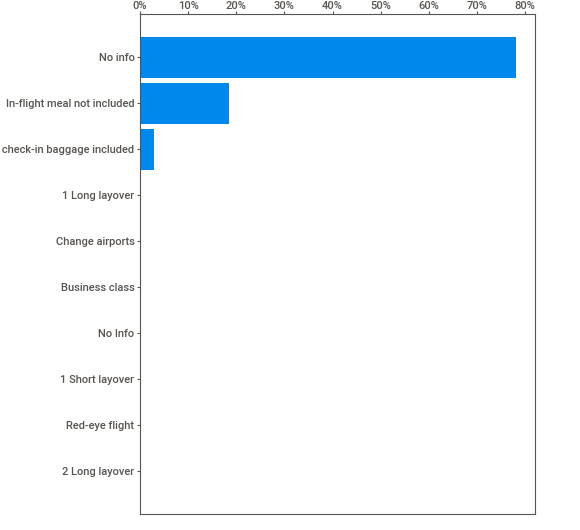
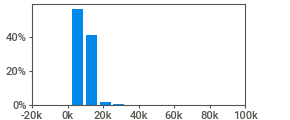
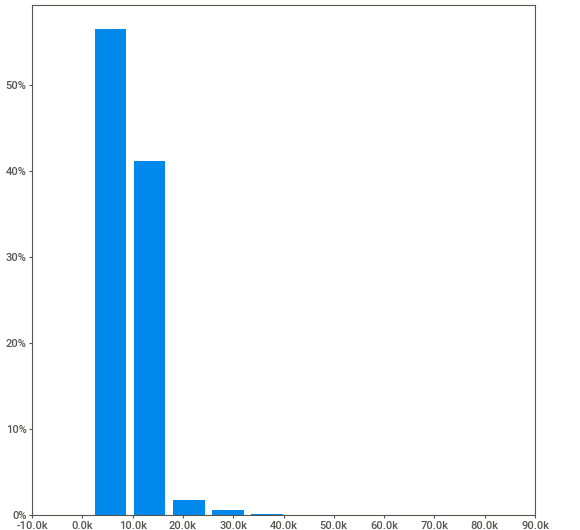
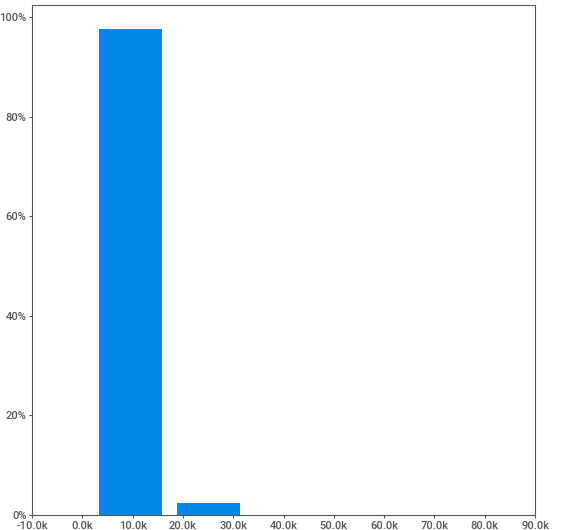
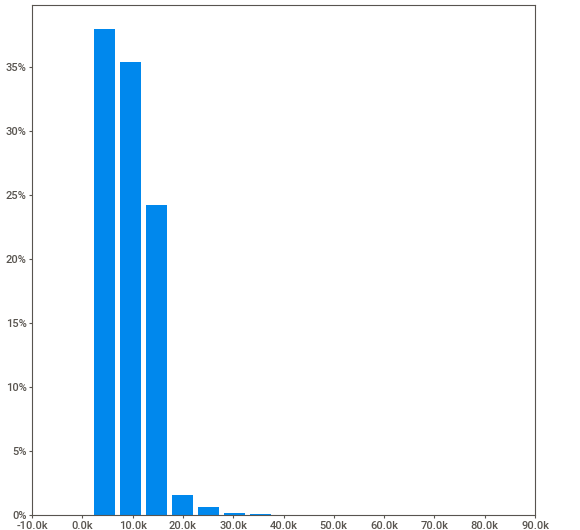
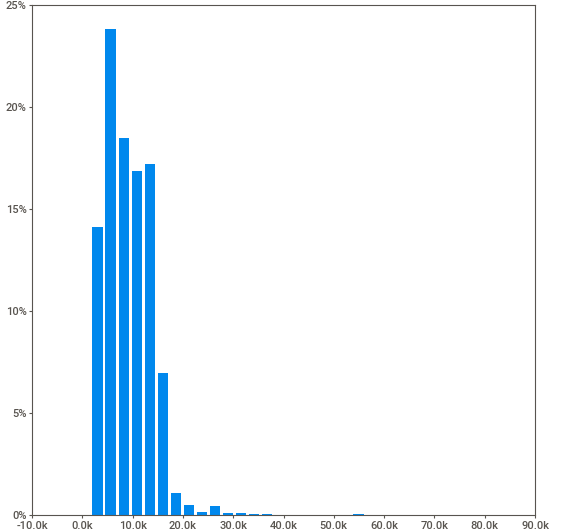
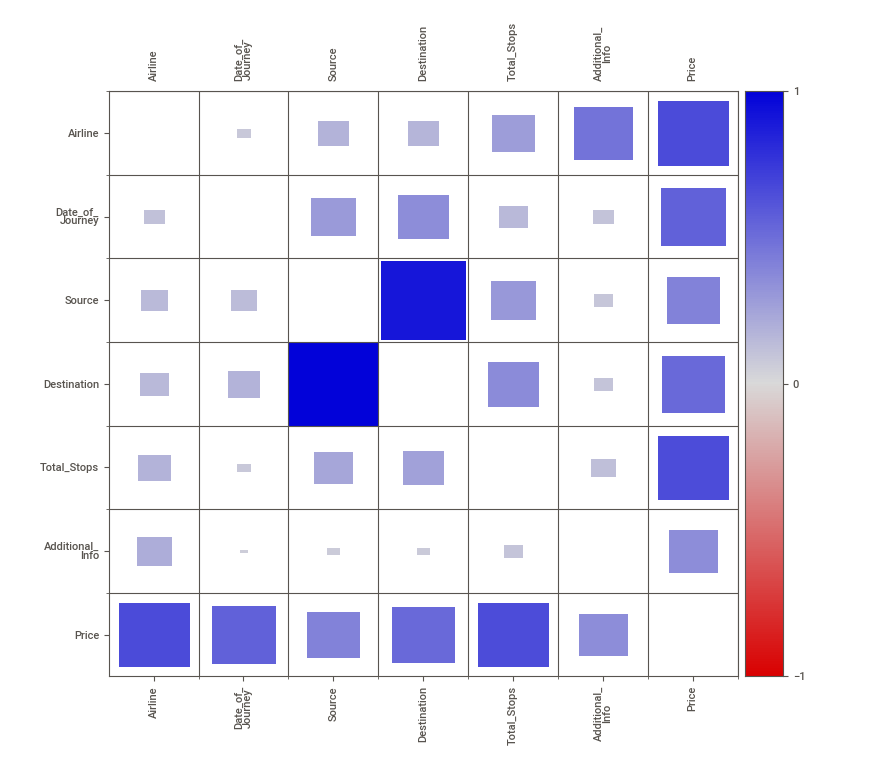
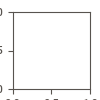

In [13]:
!pip install sweetviz
# We can use sweet viz for a interactive univariate analysis of all columns
import sweetviz as sv
my_report=sv.analyze(df)
my_report.show_notebook()

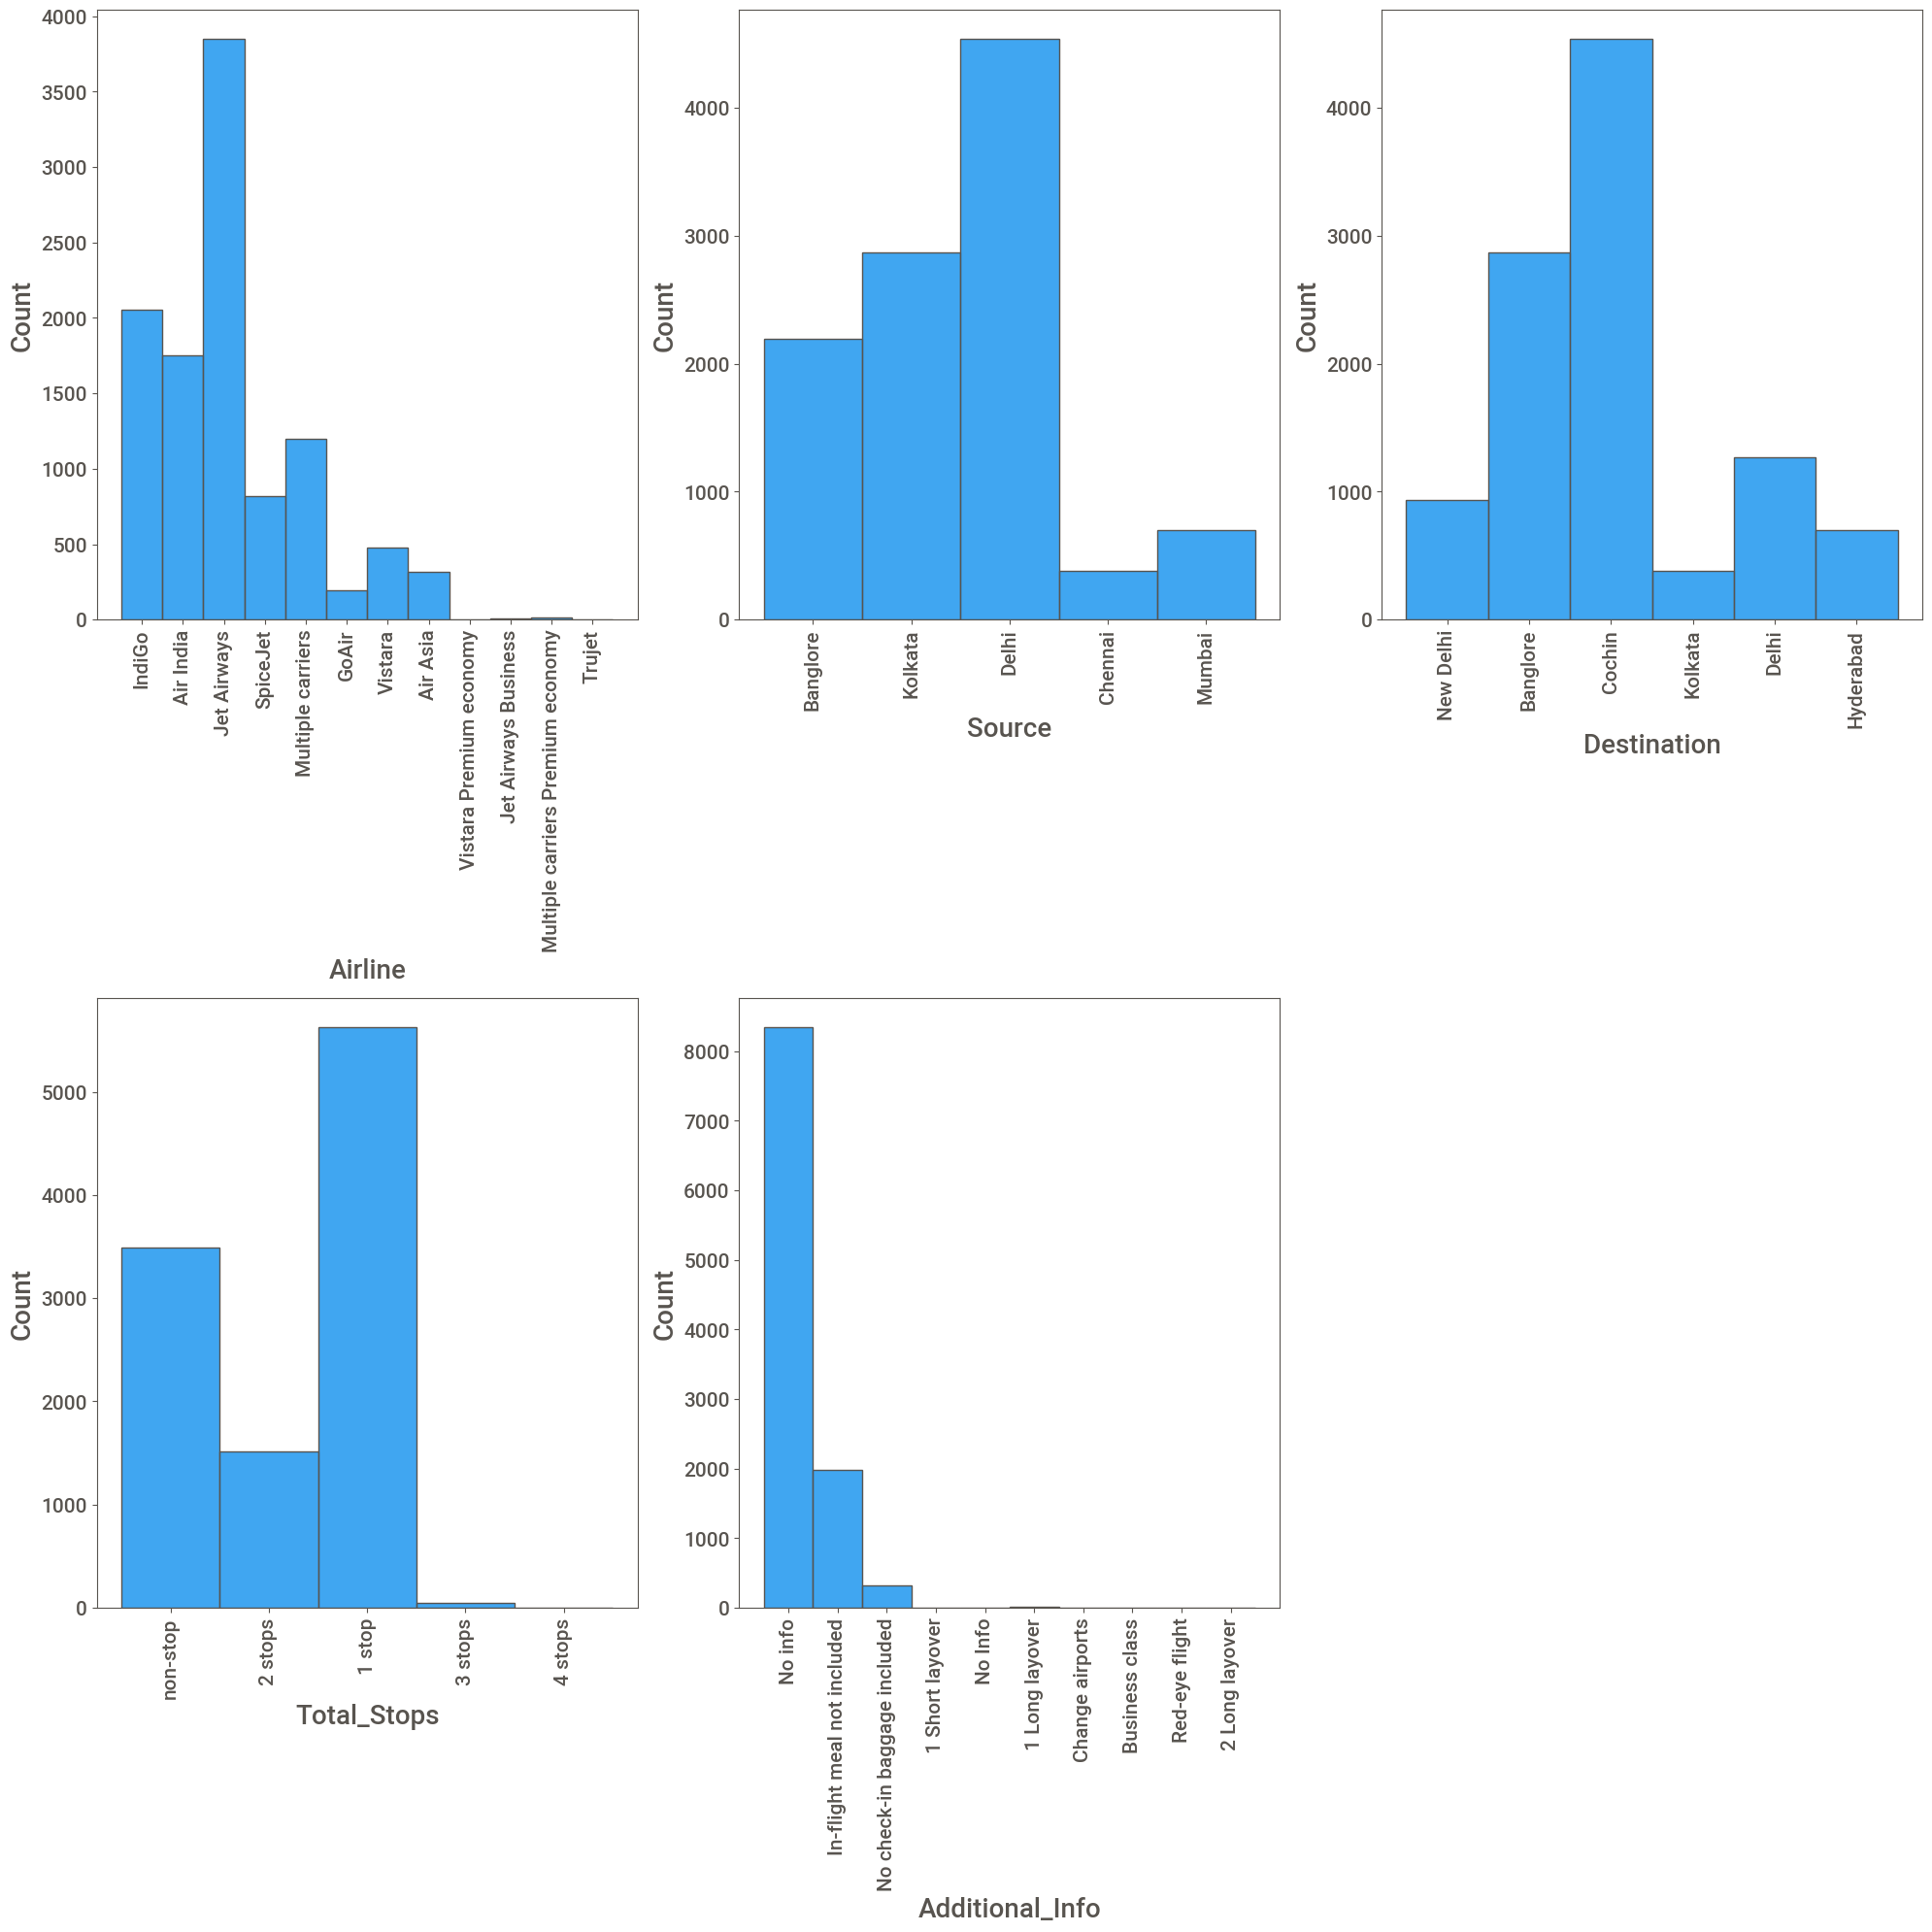

In [14]:
# Histplots/Univariate Analysis of categorical data
plt.figure(figsize=(20,20))
plotnumber=1
for column in df[['Airline',  'Source', 'Destination', 'Total_Stops','Additional_Info']]:  # Only taking the categorical columns
  ax=plt.subplot(2,3,plotnumber)
  sns.histplot(df[column],bins="auto")
  plt.xticks(fontsize=15,rotation=90)  #rotation avoids overlapping texts
  plt.yticks(fontsize=15)
  plt.xlabel(column,size=20)
  plt.ylabel('Count',size=20)
  plotnumber+=1
plt.tight_layout()


##### Conclusion
- It shows that jet airways has the maximum number of flight that is more then 3500.
- AirAsia has less then 500 flights.
- Vistara premium economy,JetAirwaysBuisness,Truejet has very less number of flight.
- It shows that there are more number of flights from Delhi and from Chennai there are less flights.
- It shows that there are more than 500 flights which have only 1 stop and
there is *1* flights which have 4 stops.
- Majority of the Additional_Info comes under No info category.


#### Bivariate Analysis

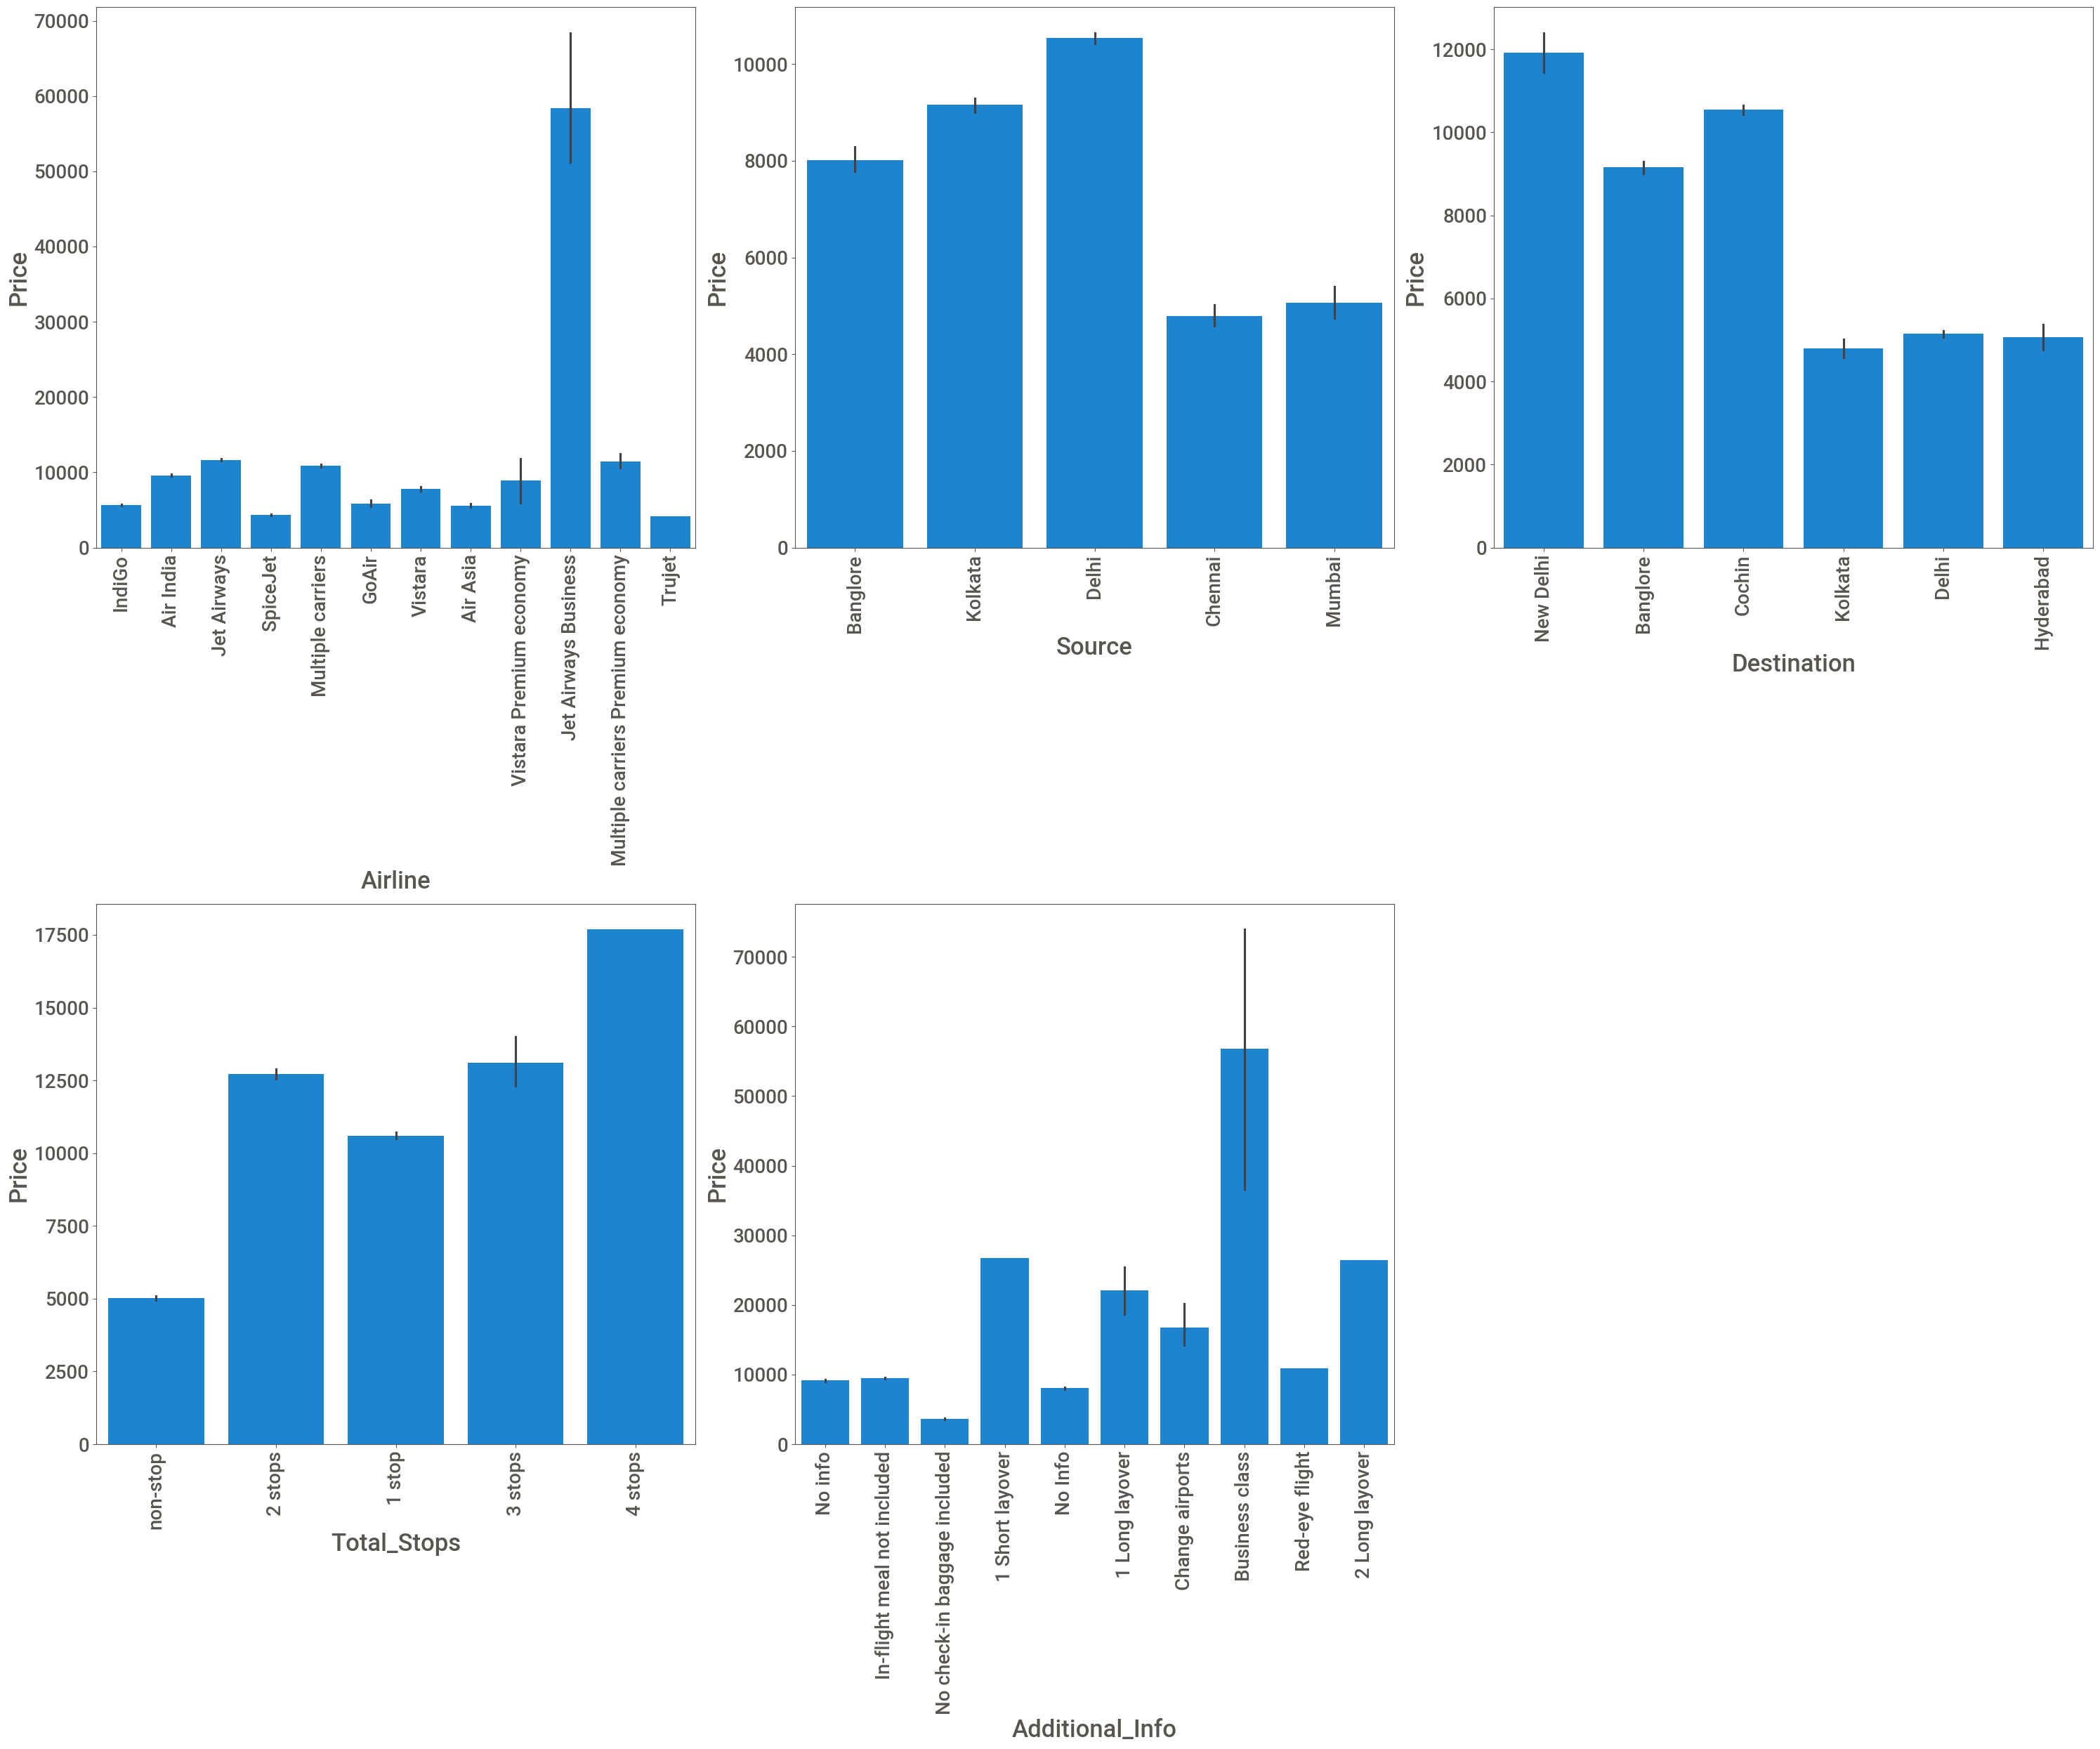

In [15]:
# Barplots/Bivariate Analysis categorical vs numerical target
plt.figure(figsize=(30,25))
plotnumber=1
for column in df[['Airline',  'Source', 'Destination', 'Total_Stops','Additional_Info']]:
  ax=plt.subplot(2,3,plotnumber)
  sns.barplot(x=column,y='Price',data=df)
  plt.xticks(fontsize=20,rotation=90)
  plt.yticks(fontsize=20)
  plt.xlabel(column,size=25)
  plt.ylabel('Price',size=25)
  plotnumber+=1
plt.tight_layout()

#### Conclusions
- We can see the price is increasing as Total_stops increases.
- Jet Airways business has the highest price.
- Flights taking off from delhi and landing at Delhi has slightly higher prices.

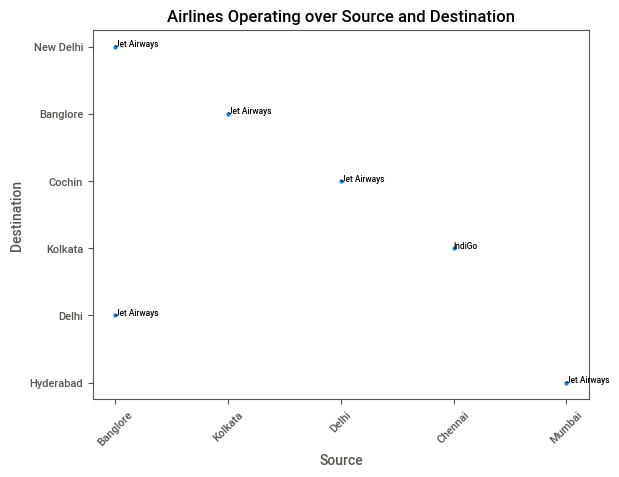

In [16]:
# Group the data by 'Source' and 'Destination', and find the airline with the maximum count
max_airlines = df.groupby(['Source', 'Destination'])['Airline'].agg(lambda x: x.value_counts().idxmax())

# Create the scatter plot
sns.scatterplot(x='Source', y='Destination', data=df)

# Add labels for the scatter points with the airline having the maximum flights
for (source, destination), airline in max_airlines.items():
    # Adjust x and y coordinates for the label to be further away from the scatter point
    plt.text(source , destination , airline, fontsize=6, ha='left')

plt.title("Airlines Operating over Source and Destination")
plt.xlabel("Source")
plt.ylabel("Destination")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

* Jet Airways Operates the Maximum Flights between all the Routes except Chennai→Kolkata, Where IndiGo has the Highest number of flights.

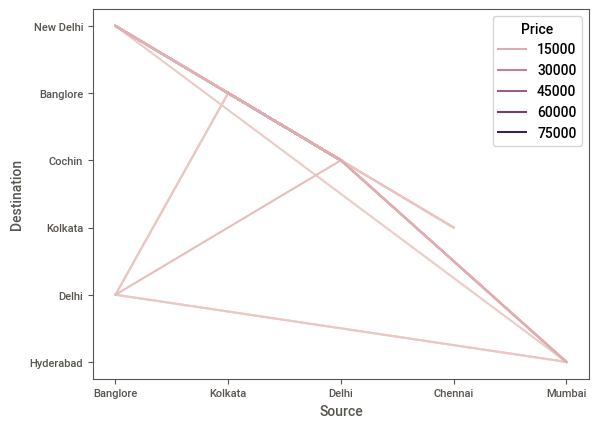

In [17]:
sns.lineplot(x='Source',y='Destination',data=df,hue='Price',errorbar=None)
plt.show()

- There is minimum cost of travel between Mumbai to Delhi.

# Data Preprocessing and Feature Engineering

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [19]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [20]:
df.dropna(axis=0,inplace=True) #Dropping rows with null values, we are choosing to drop the row because

In [21]:
df.isnull().sum() #Now null there are no null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [22]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
# We can see from the bivariate analysis graph that the price increases as the number of stops increases,
# So we can replace it as follows
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [25]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [26]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [27]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [28]:
# We will do dummy encoding for Airline, Source and Destination since the do not have any order or hierarchy
Airline=pd.get_dummies(df[['Airline']],drop_first=True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,True,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,True,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,True,False


In [29]:
Source=pd.get_dummies(df[['Source']],drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
...,...,...,...,...
10678,False,False,True,False
10679,False,False,True,False
10680,False,False,False,False
10681,False,False,False,False


In [30]:
Destination=pd.get_dummies(df[['Destination']],drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
10678,False,False,False,False,False
10679,False,False,False,False,False
10680,False,True,False,False,False
10681,False,False,False,False,True


In [31]:
#let data be our new dataframe
data=pd.concat([Airline,Source,Destination,df],axis=1)


In [32]:
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_Kolkata,Destination_New Delhi,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,True,False,False,False,False,False,False,False,...,False,True,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,True,False,False,False,False,False,False,False,False,False,...,False,False,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,False,False,False,True,False,False,False,False,False,False,...,False,False,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,False,False,True,False,False,False,False,False,False,False,...,False,False,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,False,False,True,False,False,False,False,False,False,False,...,False,True,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,...,False,False,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,True,False,False,False,False,False,False,False,False,False,...,False,False,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,False,False,False,True,False,False,False,False,False,False,...,False,False,27/04/2019,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,False,False,False,False,False,False,False,False,False,True,...,False,True,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [33]:
# Let us extract day from Day_of_Journey
data['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [34]:
#Let us extract Month from Month_of_Journey
data['Month_of Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [35]:
#dropping after extraction
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [36]:
# Lets extract hour and minute from Dep_Time
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_minute']=pd.to_datetime(data['Dep_Time']).dt.minute

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\1659580522.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\1659580522.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_minute']=pd.to_datetime(data['Dep_Time']).dt.minute


In [37]:
#Dropping after extraction
data.drop(['Dep_Time'],axis=1,inplace=True)

In [38]:
#Lets extract hour and minute from Arrival_Time
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_minute']=pd.to_datetime(data['Arrival_Time']).dt.minute

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\2207719066.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\2207719066.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_minute']=pd.to_datetime(data['Arrival_Time']).dt.minute


In [39]:
# Dropping after extraction
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [40]:
pd.set_option('display.max_columns',None)

In [41]:
data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,CCU → BLR,2h 30m,0,No info,4107,9,4,19,55,22,25
10679,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,CCU → BLR,2h 35m,0,No info,4145,27,4,20,45,23,20
10680,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,BLR → DEL,3h,0,No info,7229,27,4,8,20,11,20
10681,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,BLR → DEL,2h 40m,0,No info,12648,1,3,11,30,14,10


In [42]:
# We  can drop Route because we already have Source,Destination and Total_stops which serves the same purpose
# We can drop Additional_info because more than 80% of it is No info
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [43]:
data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration,Total_Stops,Price,Day_of_Journey,Month_of Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2h 50m,0,3897,24,3,22,20,1,10
1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7h 25m,2,7662,1,5,5,50,13,15
2,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,19h,2,13882,9,6,9,25,4,25
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,5h 25m,1,6218,12,5,18,5,23,30
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4h 45m,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2h 30m,0,4107,9,4,19,55,22,25
10679,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2h 35m,0,4145,27,4,20,45,23,20
10680,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3h,0,7229,27,4,8,20,11,20
10681,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2h 40m,0,12648,1,3,11,30,14,10


In [44]:
# Splitting the Duration Column might be a bit Challenging some rows has hour and minute, while some only either hours or minutes
duration = list(data["Duration"]) # creating a list with all values of duration column
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    #To check if it contains either one of hours or minutes
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # if duration contains only hours , we are adding '0m' to it
        else:
            duration[i] = "0h " + duration[i]    # if duration contains only minutes we are adding '0h' to it

In [45]:
duration # now we can see the list of duration we created that has both hours and minutes

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [46]:
# Now from the list of duration we created above we must split it into hours and minutes
#Creating empty lists to hold hour and mins
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(duration[i].split("h")[0])    # Extract hours from duration
    duration_mins.append(duration[i].split("m")[0].split()[1])   # Extracts only minutes from duration


In [47]:
# Add duration_hours and duration_mins list to our dataset
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data.drop(["Duration"], axis = 1, inplace = True) #Dropping it because we extracted hours and minutes from it already

In [48]:
data[['Duration_hours','Duration_mins']]

,Duration_hours,Duration_mins
0,2,50
1,7,25
2,19,0
3,5,25
4,4,45
...,...,...
10678,2,30
10679,2,35
10680,3,0
10681,2,40


# Feature selection

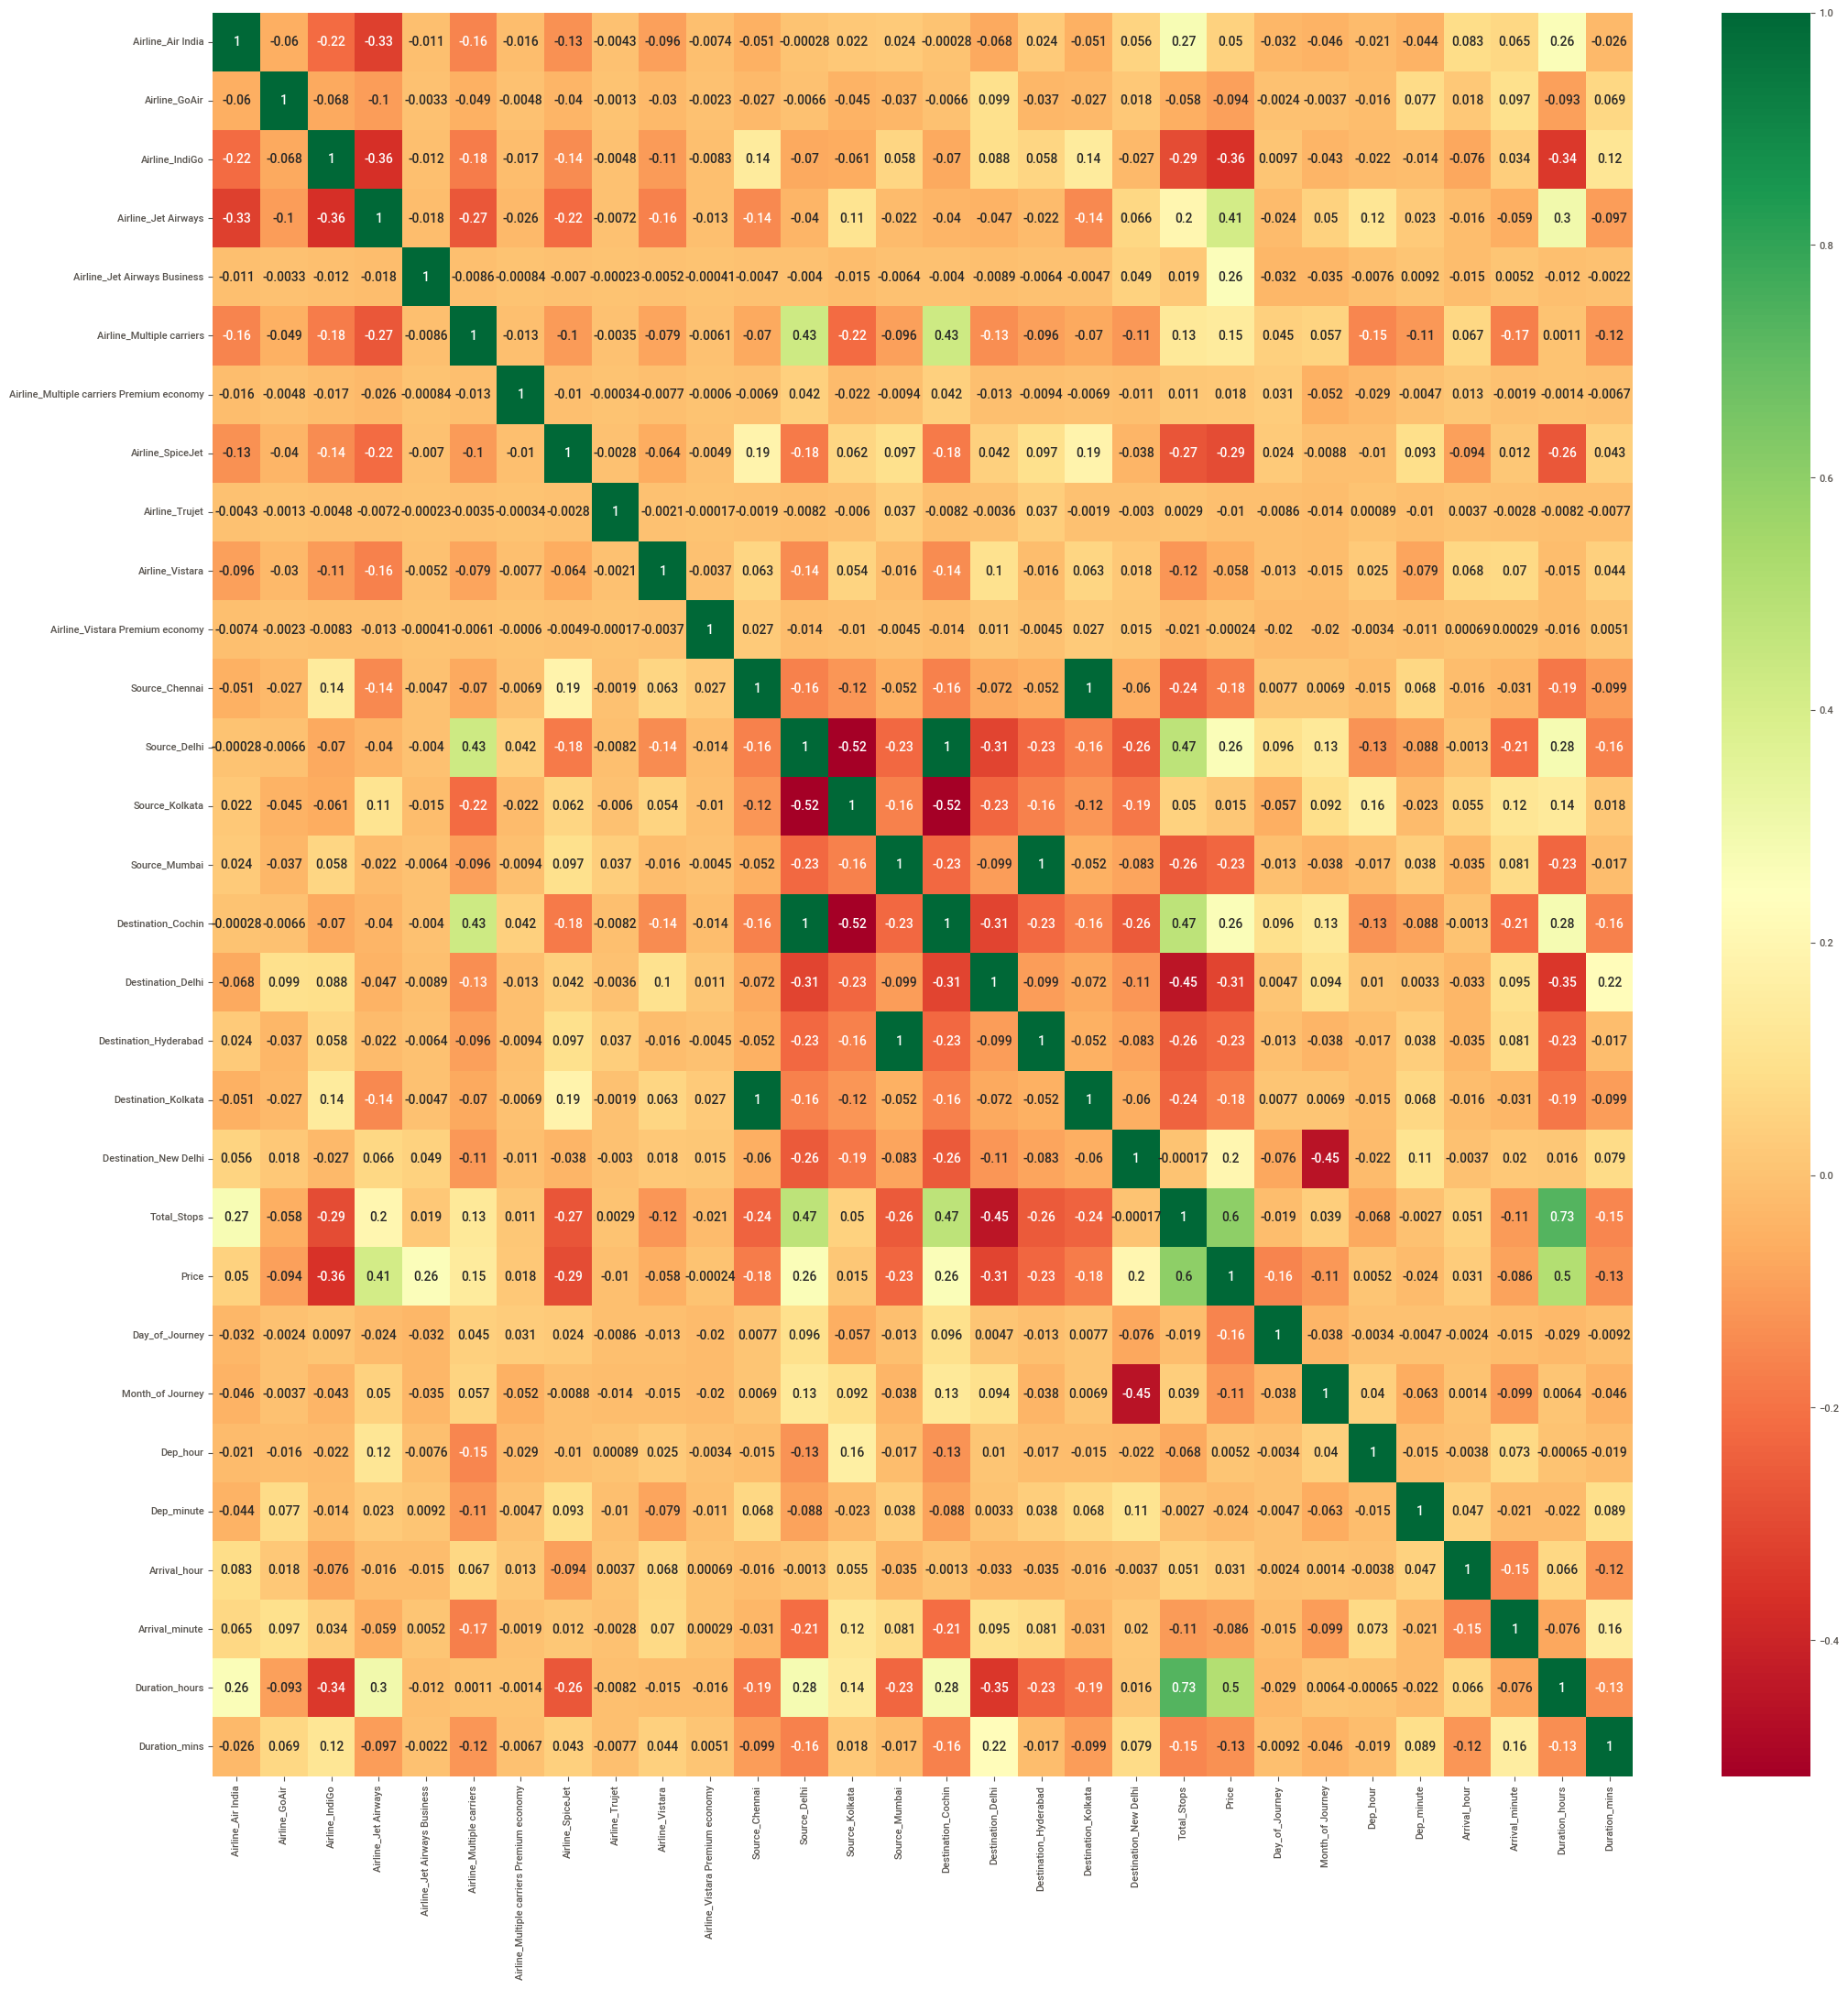

In [49]:
# Lets plot a heatmap
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### Comments
- We can see from the heat map that price depends a lot on total_stops

In [50]:
# The dataset is ready to be taken for model creation as we have done all necessary steps of the preprocessing pipeline

In [51]:
data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,Day_of_Journey,Month_of Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,3897,24,3,22,20,1,10,2,50
1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2,7662,1,5,5,50,13,15,7,25
2,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,2,13882,9,6,9,25,4,25,19,0
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,6218,12,5,18,5,23,30,5,25
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,4107,9,4,19,55,22,25,2,30
10679,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,4145,27,4,20,45,23,20,2,35
10680,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,7229,27,4,8,20,11,20,3,0
10681,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,12648,1,3,11,30,14,10,2,40


# Model Creation

In [52]:
# Before model creation we will convert all columns to int because certain models only understands int
data=data.astype(int)

In [53]:
X=data.drop('Price',axis=1)
y=data['Price']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [55]:
# defining a function that can give train and test accuracy that can be used for all models for easiness
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def evaluate_predictions(y_pred_train_m,y_pred_test_m):
  train_r2=r2_score(y_train,y_pred_train_m)
  train_mse=mean_squared_error(y_pred_train_m,y_train)
  train_rmse=mean_squared_error(y_pred_train_m,y_train,squared=False)
  train_mae=mean_absolute_error(y_pred_train_m,y_train)

  test_r2=r2_score(y_test,y_pred_test_m)
  test_mse=mean_squared_error(y_pred_test_m,y_test)
  test_rmse=mean_squared_error(y_pred_test_m,y_test,squared=False)
  test_mae=mean_absolute_error(y_pred_test_m,y_test)

  metrics = {
        'train_r2':train_r2,
        'train_mse':train_mse,
        'train_rmse':train_rmse,
        'train_mae':train_mae,

        'test_r2':test_r2,
        'test_mse':test_mse,
        'test_rmse':test_rmse,
        'test_mae':test_mae,
    }

  return metrics

In [56]:
#Linear Regression
from sklearn.linear_model import LinearRegression

m1=LinearRegression()
m1.fit(X_train,y_train)
y_pred_train_m1=m1.predict(X_train)
y_pred_test_m1=m1.predict(X_test)

evaluate_predictions(y_pred_train_m1,y_pred_test_m1)

{'train_r2': 0.6109743802156172,
 'train_mse': 8420356.35697188,
 'train_rmse': 2901.785029421008,
 'train_mae': 1999.8575349655941,
 'test_r2': 0.6595789388221707,
 'test_mse': 7017687.042550373,
 'test_rmse': 2649.0917391721964,
 'test_mae': 1883.139619213576}

In [57]:
#SVR
from sklearn.svm import SVR

m2 = SVR()
m2.fit(X_train, y_train)
y_pred_train_m2 = m2.predict(X_train)
y_pred_test_m2 = m2.predict(X_test)

evaluate_predictions(y_pred_train_m2, y_pred_test_m2)


{'train_r2': -0.0002797237602532032,
 'train_mse': 21650789.31146748,
 'train_rmse': 4653.040867160687,
 'train_mae': 3532.6277276062733,
 'test_r2': -0.0007122268318342506,
 'test_mse': 20629408.777651913,
 'test_rmse': 4541.9608956542015,
 'test_mae': 3539.7604593280475}

In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

m3 = DecisionTreeRegressor()
m3.fit(X_train, y_train)
y_pred_train_m3 = m3.predict(X_train)
y_pred_test_m3 = m3.predict(X_test)

evaluate_predictions(y_pred_train_m3, y_pred_test_m3)


{'train_r2': 0.9723526482961403,
 'train_mse': 598419.594581103,
 'train_rmse': 773.5758492747191,
 'train_mae': 296.41239697510406,
 'test_r2': 0.7283123661810642,
 'test_mse': 5600766.24188753,
 'test_rmse': 2366.593805849988,
 'test_mae': 1347.2931957186545}

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

m4 = RandomForestRegressor()
m4.fit(X_train, y_train)
y_pred_train_m4 = m4.predict(X_train)
y_pred_test_m4 = m4.predict(X_test)

evaluate_predictions(y_pred_train_m4, y_pred_test_m4)


{'train_r2': 0.9538009413172741,
 'train_mse': 999966.3715742369,
 'train_rmse': 999.9831856457572,
 'train_mae': 575.0206502778843,
 'test_r2': 0.8326103418127001,
 'test_mse': 3450692.008460417,
 'test_rmse': 1857.603835175955,
 'test_mae': 1154.1067898023762}

In [60]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

m5 = GradientBoostingRegressor() # we can give n_estimators different values in hyperparameter tuning step to improve performance
m5.fit(X_train, y_train)
y_pred_train_m5 = m5.predict(X_train)
y_pred_test_m5 = m5.predict(X_test)

evaluate_predictions(y_pred_train_m5, y_pred_test_m5)


{'train_r2': 0.7773155413277639,
 'train_mse': 4819946.0442190645,
 'train_rmse': 2195.437551883238,
 'train_mae': 1521.8250747231173,
 'test_r2': 0.8017331025816905,
 'test_mse': 4087217.8477004003,
 'test_rmse': 2021.686881715465,
 'test_mae': 1485.826714123083}

In [61]:
# XGBoost
import xgboost as xgb

m6 = xgb.XGBRegressor()
m6.fit(X_train, y_train)
y_pred_train_m6 = m6.predict(X_train)
y_pred_test_m6 = m6.predict(X_test)

evaluate_predictions(y_pred_train_m6, y_pred_test_m6)


{'train_r2': 0.9351462160333844,
 'train_mse': 1403742.9524555318,
 'train_rmse': 1184.7965869530228,
 'train_mae': 816.5868053723135,
 'test_r2': 0.867042080958039,
 'test_mse': 2740891.125939533,
 'test_rmse': 1655.5636882764531,
 'test_mae': 1104.735653051907}

In [62]:
models=['Linear Regression','SVR','Decision Tree','Random Forest','Gradient Boosting','XGBoost']
test_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['test_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['test_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['test_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['test_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['test_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['test_r2']
           ]
train_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['train_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['train_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['train_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['train_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['train_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['train_r2']
           ]


In [63]:
pd.DataFrame({'Models':models,'train_r2_scores':train_r2_scores,'test_r2_scores':test_r2_scores})

,Models,train_r2_scores,test_r2_scores
0,Linear Regression,0.610974,0.659579
1,SVR,-0.000280,-0.000712
2,Decision Tree,0.972353,0.728312
3,Random Forest,0.953801,0.832610
4,Gradient Boosting,0.777316,0.801733
5,XGBoost,0.935146,0.867042


In [64]:
# We can see the XGBoost m6 performs well
# lets use cross validation to see if the model generalises well using cross validation
from sklearn.model_selection import cross_val_score
sc=cross_val_score(m6,X,y,cv=5,scoring='r2')

In [65]:
sc

array([0.82996324, 0.83469183, 0.86350864, 0.8417053 , 0.83765274])

In [66]:
sc.mean()

0.8415043500602127

- We can see the xgboost model m6 generalises well

In [67]:
#Lets try hyperparameter tuning of xgboost now

In [ ]:
#Trying different values of hyperparameters for XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid=  {
             'n_estimators': [50,100,200,500],
             'learning_rate':[0.1,0.2,0.3,0.7,1],
             'max_depth':[3,4,5,6,7,10],
             }
model=XGBRegressor()
grid=GridSearchCV(model,param_grid,cv=5,scoring='r2',verbose=2)
grid.fit(X_train,y_train)

best_model = grid.best_estimator_  #the best performing model
print(grid.best_params_)    #Hyperparameters of the best performing model

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_

[CV] END ...learning_rate=0.1, max_depth=10, n_estimators=50; total time=   2.3s
[CV] END ...learning_rate=0.1, max_depth=10, n_estimators=50; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=10, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=10, n_estimators=50; total time=   1.8s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.5s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.1s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.7s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.9s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   7.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   9.8s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   9.1s
[CV] END ..learning_rate=0.1

[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   3.6s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   2.1s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   3.4s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   3.7s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   5.0s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   3.1s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   2.0s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   3.7s


- we can see the hyperparameters of the best performing model

In [ ]:
grid.best_score_  #Best score achived by gridsearchCV

In [ ]:
best_model

In [ ]:
# Lets create a XGBRegressor model with the hyperparameters we got from grid searchCV and see if the overall performance is increasing
import xgboost as xgb

m7 = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 200)
m7.fit(X_train, y_train)
y_pred_train_m7 = m7.predict(X_train)
y_pred_test_m7 = m7.predict(X_test)

evaluate_predictions(y_pred_train_m7, y_pred_test_m7)


- we can see that for m7 the test_r2 has increased slightly to 87%

In [ ]:
# Lets use cv for m7
# lets use cross validation to see if the model generalises well using cross validation
from sklearn.model_selection import cross_val_score
sc=cross_val_score(m7,X,y,cv=5,scoring='r2')
sc

In [ ]:
sc.mean()

- both m6 and m7 gives similar results in evalutaion
- m7 gives lower variance ie the difference between the training and test r2_score is much lower so m7 does a better job in generalization

In [ ]:
## lets create a model comparison report of all models we made
Algorithms=['Linear Regression','SVR','Decision Tree','Random Forest','Gradient Boosting','XGBoost','XGBoost with tuning']
models=['m1','m2','m3','m4','m5','m6','m7']
test_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['test_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['test_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['test_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['test_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['test_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['test_r2'],
           evaluate_predictions(y_pred_train_m7, y_pred_test_m7)['test_r2']
           ]
train_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['train_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['train_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['train_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['train_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['train_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['train_r2'],
           evaluate_predictions(y_pred_train_m7, y_pred_test_m7)['train_r2']
           ]

cross_val_scores=[cross_val_score(m1,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m2,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m3,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m4,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m5,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m6,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m7,X,y,cv=5,scoring='r2').mean(),
                  ]

In [ ]:
r2_scores# r2 scores of all different models

# Model Comparison report

In [ ]:
comparison_report=pd.DataFrame({'Algorithm':Algorithms,
                                'Models':models,
                                'train_r2_scores':train_r2_scores,
                                'test_r2_scores':test_r2_scores,
                                'Cross_val_scores':cross_val_scores}).sort_values('test_r2_scores',ascending=False)
comparison_report

In [ ]:
# comparison graph of test r2 score
plt.figure(figsize=(7,2))
plt.bar(comparison_report['Models'], comparison_report['test_r2_scores'],color=['blue', 'green', 'orange','red','violet','black','magenta'],label=Algorithms )
plt.legend()
plt.title('Comparison of R-squared Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for R2 scores
plt.show()

# Conclusion
- Both m6 and m7 performs well
- From the model comparison report , we can conclude that the r2_scores of m7 is performing well and does not overfit and performs well even with cross validation
- We can chose m7 as our final model ie XGBOOST with hyperparameter tuning